<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/EDA_on_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset details are given in 
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

**Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
nyc_df = pd.read_csv("AB_NYC_2019.csv")


In [ ]:
nyc_df.shape

(48895, 16)

When you start working on any data science project the data you are provided is never clean. One of the most common issue with any data set are missing values. Most of the machine learning algorithms are not able to handle missing values. The missing values needs to be addressed before proceeding to applying any machine learning algorithm.
Missing values can be handled in different ways depending on if the missing values are continuous or categorical. In this section I will address how to find missing values. In the next article i will address on how to address the missing values.

**Step 1: Load the data frame and study the structure of the data frame.**
First step is to load the file and look at the structure of the file. When you have a big dateset with high number of columns it is hard to look at each columns and study the types of columns.


To find out how many of the columns are categorical and numerical we can use pandas **“dtypes”** to get the different data types and you can use pandas **“value_counts()”** function to get count of each data type. Value_counts groups all the unique instances and gives the count of each of those instances.

In [ ]:
nyc_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
nyc_df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

**Step 2: Separate categorical and numerical columns in the data frame**
The reason to separate the categorical and numerical columns in the data frame is the method of handling missing values are different between these two data types.

The easiest way to achieve this step is through filtering out the columns from the original data frame by data type. By using “dtypes” function and equality operator you can get which columns are objects (categorical variable) and which are not.


In [ ]:
nyc_df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
num_vars = nyc_df.columns[nyc_df.dtypes != 'object']
cat_vars = nyc_df.columns[nyc_df.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


**Finding the missing values**
List allt he columns in the dataframe that has numeric variables and use isNull() function to find out if it has missing values. It will return true if field has missing values and false if it does not have missing values. 


In [ ]:
nyc_df[num_vars]

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


In [ ]:
nyc_df[num_vars].isnull()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,True,False,False
48891,False,False,False,False,False,False,False,True,False,False
48892,False,False,False,False,False,False,False,True,False,False
48893,False,False,False,False,False,False,False,True,False,False


In [ ]:
nyc_df[num_vars].isnull().sum().sort_values(ascending = False)

reviews_per_month                 10052
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
longitude                             0
latitude                              0
host_id                               0
id                                    0
dtype: int64

The above give you the count of missing values in each column. To get % of missing values in each column you can divide by length of the data frame. 
You can “len(df)” which gives you the number of rows in the data frame.


In [ ]:
nyc_df[num_vars].isnull().sum().sort_values(ascending = False)/len(nyc_df)


reviews_per_month                 0.205583
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
longitude                         0.000000
latitude                          0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Now let us look at the non numerical data that is missing


In [ ]:
nyc_df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Handling Missing value**
3 types of missing values
1.   Missing Completely at Random - ignorable
2.   Missing at Random - ignorable
3. Missing not att Random - Not Ignorable

Actions

1. Droping the row where there are missing values
This to be used when other methods of handling missing value not useful. All rows with missing value are dropped
--> dropna() function
Dropping the entire row/column only 

then there are multiple missing values in a row
--> dropna(axis =0, thresh=2)
--> drop([column], axis=1)

2. Imputing missing values
a. Replacing with a given value
-->fillna(value)

b. replacing with mean/median/mode
In presence of outlier this can lead to problem . So we can think of median as well. 
fillna(dataset['column'].mean()/dataset['column'].median()/dataset['column'].mode()[0]

c. Replacing with previous value - forward fill --> method ='ffill'

d. Replacing with net value Backward fill--> method ='bfill'

e. Replacing with average of previous and next value

f. Model based Imputation

Here we have 4 columns with missing values. 

We will drop unnecessary  columns


In [ ]:
nyc_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

NaN in review_permonth with 0 

In [ ]:
nyc_df.reviews_per_month.fillna(0, inplace=True)

In [ ]:
print(nyc_df.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool


Exploration of Data and Visualization

In [ ]:
nyc_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object


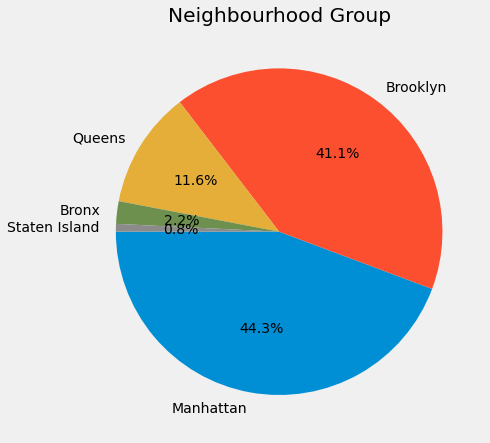

In [ ]:
print(nyc_df.neighbourhood_group)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

Room Details 


In [ ]:
print(nyc_df.room_type.unique())

['Private room' 'Entire home/apt' 'Shared room']


Let's see how people are taking different type of room

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


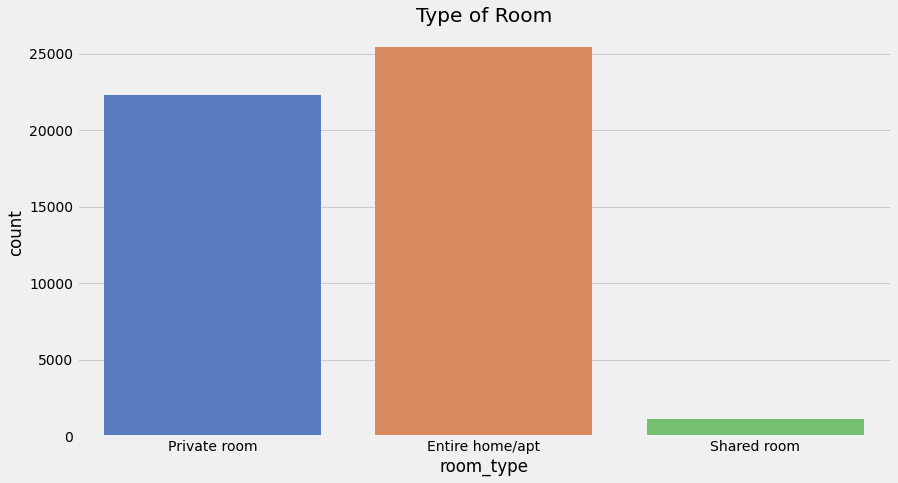

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(nyc_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.


Let’s see room types occupied by a neighborhood group.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


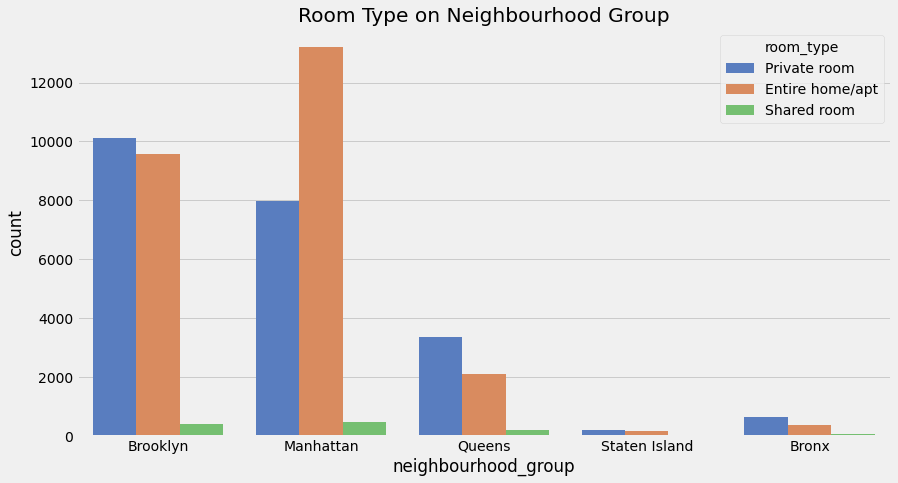

In [ ]:
plt.figure(figsize=(13,7))

plt.title("Room Type on Neighbourhood Group")

sns.countplot(nyc_df.neighbourhood_group,hue=nyc_df.room_type, palette="muted")

plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

Neighbourhood Group vs. Availability Room

In [ ]:
print(nyc_df.availability_365.unique() )

[365 355 194   0 129 220 188   6  39 314 333  46 321  12  21 249 347 364
 304 233  85  75 311  67 255 284 359 269 340  22  96 345 273 309  95 215
 265 192 251 302 140 234 257  30 301 294 320 154 263 180 231 297 292 191
  72 362 336 116  88 224 322 324 132 295 238 209 328  38   7 272  26 288
 317 207 185 158   9 198 219 342 312 243 152 137 222 346 208 279 250 164
 298 260 107 199 299  20 318 216 245 189 307 310 213 278  16 178 275 163
  34 280   1 170 214 248 262 339  10 290 230  53 126   3  37 353 177 246
 225  18 343 326 162 240 363 247 323 125  91 286  60  58 351 201 232 258
 341 244 329 253 348   2  56  68 360  76  15 226 349  11 316 281 287  14
  86 261 331  51 254 103  42 325  35 203   5 276 102  71  78   8 182  79
  49 156 200 106 135  81 142 179  52 237 204 181 296 335 282 274  98 157
 174 223 361 283 315  36 271 139 193 136 277 221 264 236  89  23 218 235
 119 350 161 259  27 167 358  59 337  43  25 127 303 115 268  44  65 252
  64 111  90 338  31 241 285 183  84 166  28  83 30

In [ ]:
#df_new = df[df['Pid'] == 'p01']
#print(nyc_df)
df_new = nyc_df[nyc_df.neighbourhood_group=='Brooklyn'].availability_365
print(nyc_df[nyc_df.neighbourhood_group=='Brooklyn'].availability_365)


0        365
3        194
6          0
12       314
15        46
        ... 
48882     31
48884    341
48887    365
48890      9
48891     36
Name: availability_365, Length: 20104, dtype: int64


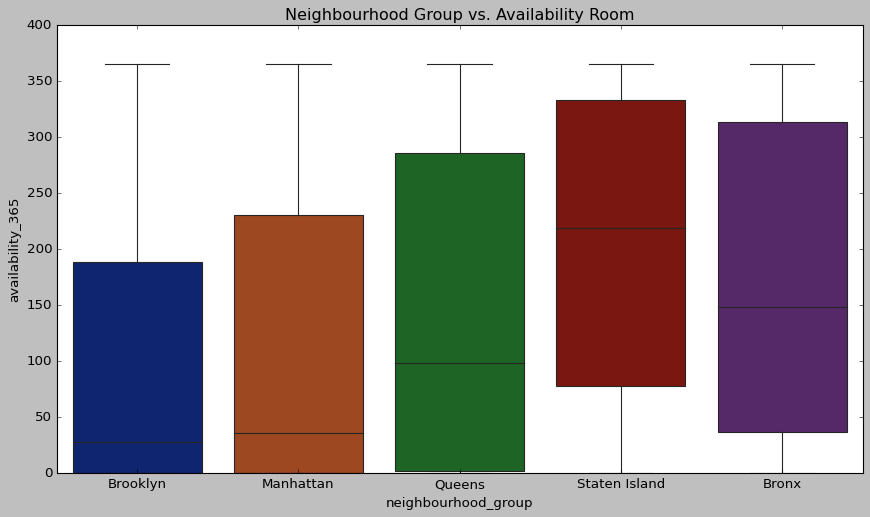

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=nyc_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

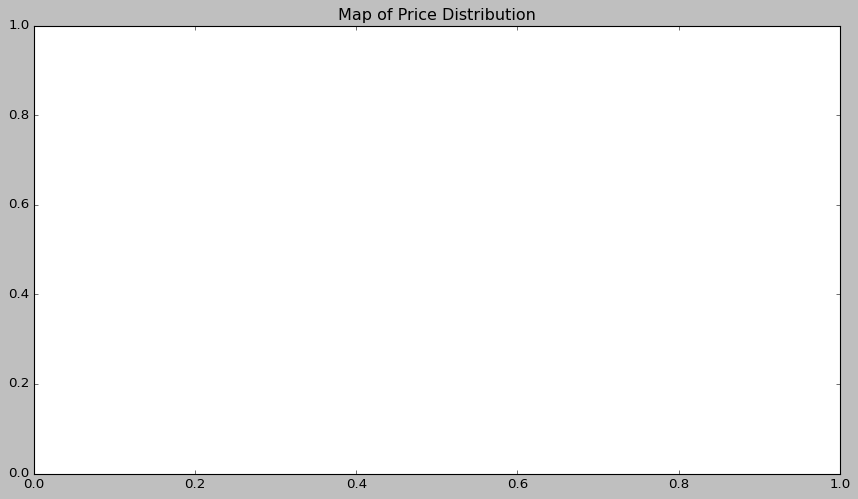

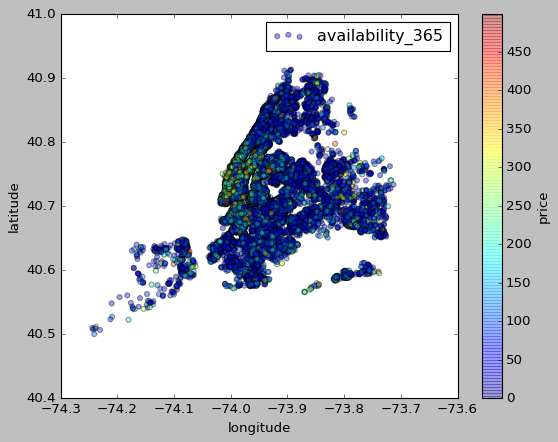

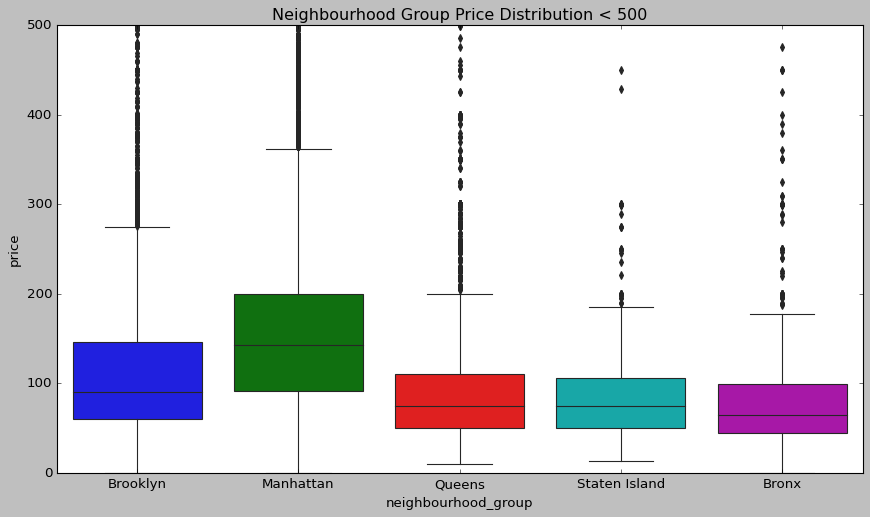

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=nyc_df[nyc_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = nyc_df[nyc_df.price<500])
plt.show()


From the boxplot above, we can definitely observe a couple of things about the distribution of prices for Airbnb in NYC.


1.   We can state that Manhattan has the highest range price for the listings with about 140 dollars as an average price, followed by Brooklyn with 90 dollars per night,
2.   Queens and Staten Island seem to have a very similar distribution,

3.     The Bronx is the cheapest.





From data we want to find correlation between the columns 

What is correlation ?

Correlation measures the relationship between two variables.

The correlation coefficient can never be less than -1 or higher than 1.

1 = there is a perfect linear relationship between the variables 
0 = there is no linear relationship between the variables
-1 = there is a perfect negative linear relationship between the variables 

The two most commonly used statistical tests for establishing relationship between variables are correlation and p-value. 

**Correlation** is a way to test if two variables have any kind of relationship, whereas **p-value** tells us if the result of an experiment is statistically significant. In this tutorial, we will be taking a look at how they are calculated and how to interpret the numbers obtained.

 There are several types of correlation coefficients (e.g. ***Pearson, Kendall, Spearman***), but the most commonly used is the Pearson’s correlation coefficient. 
 
 This coefficient is calculated as a number between -1 and 1 with 1 being the strongest possible positive correlation and -1 being the strongest possible negative correlation.

Correlation Bounds

A positive correlation means that as one number increases the second number will also increase. 
A negative correlation means that as one number increases the second number decreases. 

**However, correlation does not always imply causation** — correlation does not tell us whether change in one number is directly caused by the other number, only that they typically move together.

**P-value** evaluates how well your data rejects the null hypothesis, which states that there is no relationship between two compared groups. 

**Successfully rejecting this hypothesis tells you that your results may be statistically significant.**

 

The p-value is significant or notis checked by  by specifying a significance cutoff, known as the alpha value. 

**Alpha is usually set to 0.05,** 

 If the p-value is less than the specified alpha value, then we reject the null hypothesis. --> considered not significant....
 

 Correlation tells us whether two variables have any sort of relationship and it does not imply causation. 
 
 If two variables A and B are highly correlated, there are several possible explanations: 
 (a) A influences B; 
 (b) B influences A; 
 (c) A and B are influenced by one or more additional variables; 
 (d) the relationship observed between A and B was a chance error. 

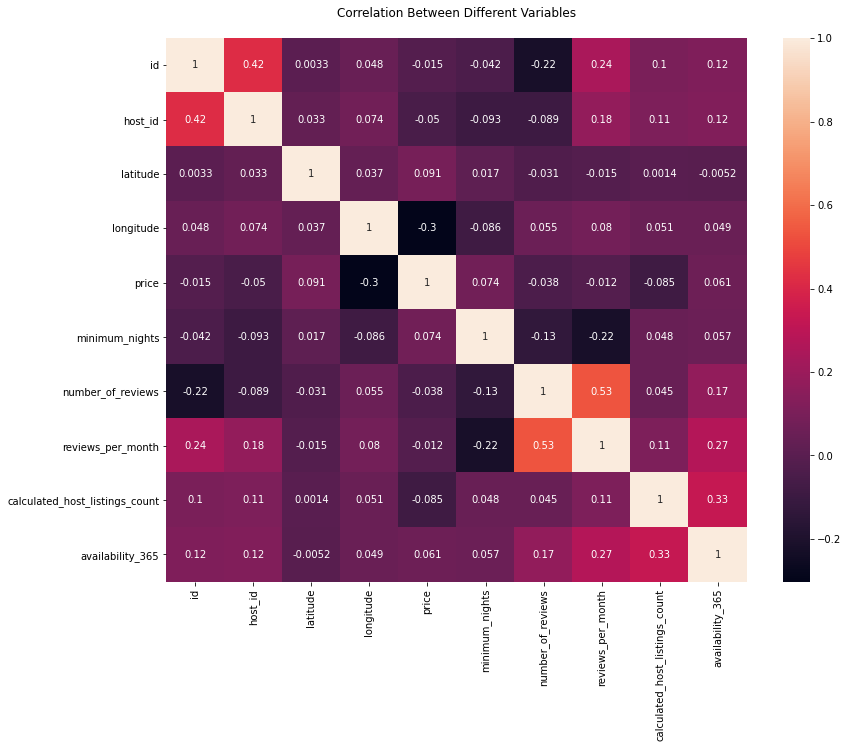

In [ ]:
corr = nyc_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

From the graph above, we know that there is not a strong correlation except **review_per_month** and **number_of_review.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

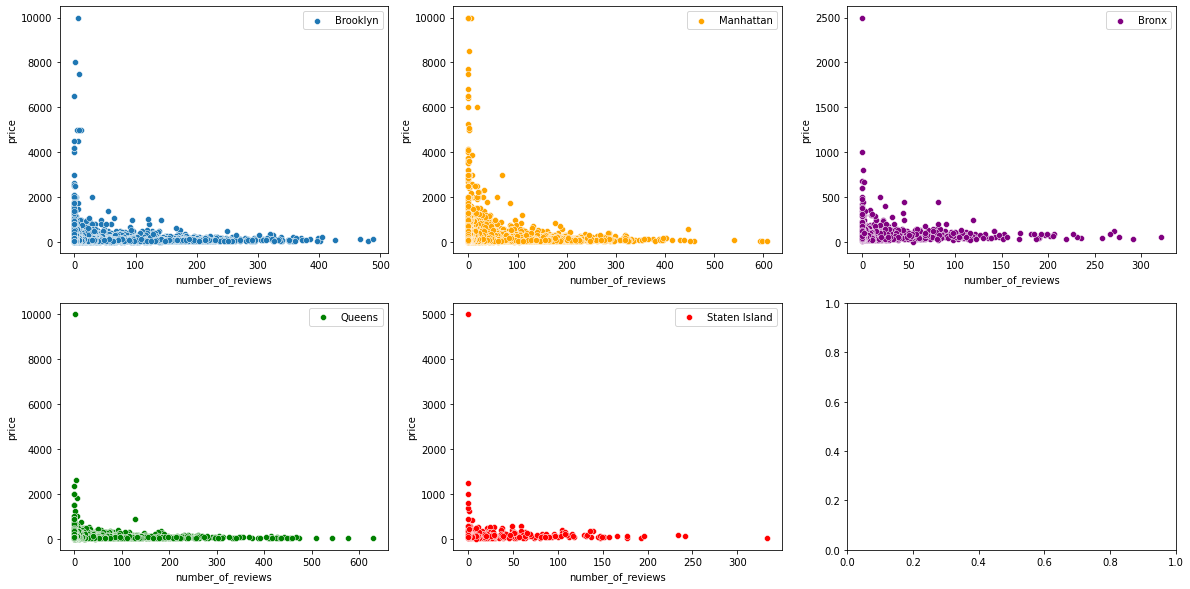

In [ ]:
df2= nyc_df.groupby('neighbourhood_group')
fig, ax = plt.subplots(2,3,figsize =(20,10))
ax = ax.flatten().T
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Brooklyn'),ax = ax[0], label ='Brooklyn')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Manhattan'),ax = ax[1],color = 'orange',label ='Manhattan')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Bronx'),ax = ax[2],color = 'purple',label ='Bronx')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Queens'),ax = ax[3],color = 'g',label ='Queens')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Staten Island'),ax = ax[4],color = 'r',label ='Staten Island')

The number of reviews shows no correlation with the price for any neighbourhood

Now, let’s try to make a price prediction using the basic machine learning model from scikit learn. 

Scikit learn is a free software machine learning library for the Python programming language.

Import library for machine learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

Then, encode label with a value between 0 and n_classes-1

In [ ]:
nyc_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
encode = preprocessing.LabelEncoder()

Fit label encoder

In [ ]:
encode.fit(nyc_df.neighbourhood_group)
nyc_df.neighbourhood_group=encode.transform(nyc_df.neighbourhood_group)
nyc_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25795,86327101,1,13,40.68279,-73.91170,1,0,1,95,4.37,6,232
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


Transform labels to normalized encoding

In [ ]:
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.neighbourhood)
nyc_df.neighbourhood=encode.transform(nyc_df.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.room_type)
nyc_df.room_type=encode.transform(nyc_df.room_type)
nyc_df.sort_values(by='price',ascending=True,inplace=True)


Now, train the linear regression model


In [ ]:
l_reg = LinearRegression()
X = nyc_df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = nyc_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Price Prediction

In [ ]:
predicts = l_reg.predict(X_test)


print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))
predicts

Mean Squared Error:  179.6626685518166
R2 Score:  12.684108146915108
Mean Absolute Error:  71.83810684214295
Mean Squareroot Error:  32278.674471159913


array([256.8057714 , 218.41799566, 229.19215201, ...,  60.58707002,
        77.90861836, -10.47612139])

variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. 

Goal is to have a low variance and this is quantified by R2 score.

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.


MAE: It is not very sensitive to outliers in comparison to MSE since it doesn't punish huge errors. It is usually used when the performance is measured on continuous variable data. It gives a linear value, which averages the weighted individual differences equally. The lower the value, better is the model's performance.

MSE: It is one of the most commonly used metrics, but least useful when a single bad prediction would ruin the entire model's predicting abilities, i.e when the dataset contains a lot of noise. It is most useful when the dataset contains outliers, or unexpected values (too high or too low values).

RMSE: In RMSE, the errors are squared before they are averaged. This basically implies that RMSE assigns a higher weight to larger errors. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model's performance. It avoids taking the absolute value of the error and this trait is useful in many mathematical calculations. In this metric also, lower the value, better is the performance of the model.

Next, we want to know the difference between the actual price and the predicted price. Let’s begin with make a new data frame called lr_pred_df

In [ ]:
lr_pred_df = pd.DataFrame({'actual_values': np.array(y_test).flatten(), 'predicted_values': predicts.flatten()}).head(20)

Visualize it

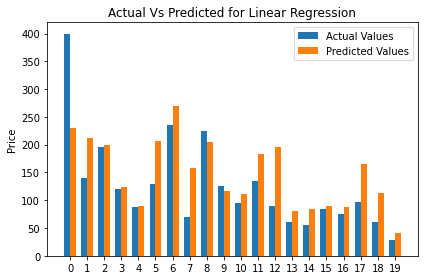

In [ ]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()